In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('santander.csv',index_col='ID',nrows=20000)
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [12]:
df.shape

(20000, 370)

In [13]:
# # FILTER METHODS:
# 1. REmoval of constant and quasiconstant features
# 2. Removal of duplicated features
# 3. Removal of highly correlated features
# 4. Mutual info gain, ANOVA, CHI2, ROC_AUC score

In [16]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test, y_train, y_test=train_test_split(X,y, stratify=y,test_size=0.2)

In [17]:
from sklearn.feature_selection import VarianceThreshold

In [21]:
filt=VarianceThreshold(threshold=0) #Detect variables with 0 variance i.e. constant values and delete
filt.fit(X_train)
X_train_con=filt.transform(X_train)
X_test_con=filt.transform(X_test)

X_train.shape,X_test.shape

((16000, 369), (4000, 369))

In [22]:
quas=VarianceThreshold(threshold=0.01) #Detect variables with just 99% constant values 
quas.fit(X_train)
X_train_quas=quas.transform(X_train)
X_test_quas=quas.transform(X_test)

X_train_quas.shape,X_test_quas.shape

((16000, 252), (4000, 252))

In [53]:
# Remove duplicated feature

print(X_train_quas.T.shape)

X_train_quas_T=pd.DataFrame(X_train_quas.T)
X_test_quas_T=pd.DataFrame(X_test_quas.T)

print(f"No of duplciated cols: {X_train_quas_T.duplicated().sum()}")

X_train_dup=X_train_quas_T.duplicated()
features_to_keep=[not i for i in X_train_dup]
X_train_uniq=X_train_quas_T[features_to_keep].T
X_test_uniq=X_test_quas_T[features_to_keep].T
X_train_uniq.shape,X_test_uniq.shape

(252, 16000)
No of duplciated cols: 20


((16000, 232), (4000, 232))

In [57]:
# Remove correlated features

cor=X_train_uniq.corr()
cor

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,1.000000,-0.010646,0.001280,0.001990,0.003843,0.001874,0.002010,0.000559,0.000678,0.001740,...,0.000469,0.000683,0.000498,0.000636,0.000655,0.000620,0.000588,0.000690,0.000758,0.000586
1,-0.010646,1.000000,0.037091,0.107510,0.110269,0.056110,0.063419,0.001805,0.003712,0.050021,...,0.023302,0.021667,0.014249,0.020863,0.021126,0.029115,0.019503,0.035564,0.038091,-0.004175
2,0.001280,0.037091,1.000000,0.031012,0.025211,0.012461,0.011281,0.001027,0.003557,0.010959,...,0.012948,-0.000654,-0.000471,-0.000588,-0.000594,-0.000170,-0.000550,-0.000152,-0.000085,-0.000038
3,0.001990,0.107510,0.031012,1.000000,0.882025,0.377249,0.347145,0.022227,0.041449,0.309127,...,0.003090,0.026254,0.030756,0.023868,0.026177,-0.001384,-0.000261,-0.001917,-0.001925,0.003404
4,0.003843,0.110269,0.025211,0.882025,1.000000,0.362551,0.412234,0.024489,0.045040,0.303826,...,0.000965,0.025926,0.048870,0.017942,0.021000,-0.001519,0.000109,-0.002068,-0.002145,0.002831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.000620,0.029115,-0.000170,-0.001384,-0.001519,-0.000572,-0.000610,-0.000172,-0.000208,-0.000534,...,-0.000145,0.007295,-0.000150,0.011028,0.010303,1.000000,0.335013,0.969788,0.944981,0.003537
248,0.000588,0.019503,-0.000550,-0.000261,0.000109,-0.000526,-0.000560,-0.000158,-0.000191,-0.000491,...,-0.000133,-0.000191,-0.000138,-0.000179,-0.000184,0.335013,1.000000,0.272504,0.277974,0.011501
249,0.000690,0.035564,-0.000152,-0.001917,-0.002068,-0.000638,-0.000680,-0.000192,-0.000232,-0.000596,...,-0.000161,0.006672,-0.000167,0.010109,0.009442,0.969788,0.272504,1.000000,0.994630,0.004224
250,0.000758,0.038091,-0.000085,-0.001925,-0.002145,-0.000700,-0.000746,-0.000210,-0.000255,-0.000653,...,-0.000177,0.009286,-0.000184,0.014033,0.013112,0.944981,0.277974,0.994630,1.000000,0.005131


In [72]:
cor_col=set()
for i in range(len(cor.columns)):
    for j in range(i):
        val=cor.iloc[i,j]
        if abs(val)>=0.85:
            cor_col.add(cor.columns[i])
print(cor_col)
len(cor_col)      

{4, 6, 8, 10, 11, 13, 14, 15, 16, 17, 22, 23, 27, 28, 30, 32, 33, 35, 36, 38, 42, 46, 47, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 67, 68, 69, 70, 72, 76, 80, 81, 82, 83, 84, 86, 87, 88, 92, 93, 95, 97, 100, 102, 103, 105, 106, 114, 118, 120, 124, 128, 129, 140, 141, 142, 152, 154, 162, 163, 164, 166, 167, 168, 169, 174, 176, 178, 184, 186, 187, 188, 189, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 208, 209, 211, 212, 216, 219, 220, 221, 223, 224, 225, 227, 228, 231, 232, 233, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 249, 250}


127

In [77]:
X_train_uc=X_train_uniq.drop(cor_col,axis=1)
X_test_uc=X_test_uniq.drop(cor_col,axis=1)
X_train_uc.shape,X_train_uc.shape

((16000, 105), (16000, 105))

In [96]:
#Mutual info gain

from sklearn.feature_selection import mutual_info_classif, SelectPercentile

mi=mutual_info_classif(X_train_uc,y_train)
mi

array([1.83736041e-03, 1.31415383e-02, 4.04614862e-03, 0.00000000e+00,
       4.18706619e-04, 2.38323940e-04, 4.39622956e-04, 4.99035837e-04,
       5.38663977e-05, 0.00000000e+00, 3.02448255e-03, 8.36976457e-03,
       1.23260447e-03, 0.00000000e+00, 7.78596493e-04, 5.92386746e-04,
       2.65227635e-03, 2.77713722e-04, 9.59034692e-03, 0.00000000e+00,
       4.35168052e-03, 1.02900656e-03, 1.03810005e-02, 4.96046298e-04,
       1.10764540e-03, 1.30656263e-03, 1.35796593e-03, 5.28704657e-04,
       9.43940731e-05, 0.00000000e+00, 0.00000000e+00, 2.07307538e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.70514043e-03, 0.00000000e+00, 0.00000000e+00, 8.32461268e-04,
       2.02480754e-03, 0.00000000e+00, 0.00000000e+00, 7.74379645e-04,
       0.00000000e+00, 1.22832346e-03, 0.00000000e+00, 1.09600185e-02,
       1.39182953e-04, 0.00000000e+00, 0.00000000e+00, 4.51263713e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

<AxesSubplot:>

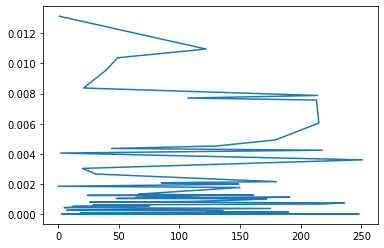

In [111]:
s=pd.Series(mi)
s.index=X_train_uc.columns

s.sort_values(ascending=False).plot()


In [172]:
sel=SelectPercentile(score_func=mutual_info_classif,percentile=90).fit(X_train_uc,y_train)
X_train_mi=sel.transform(X_train_uc)
X_test_mi=sel.transform(X_test_uc)

In [173]:
X_train_mi.shape,X_test_mi.shape

((16000, 94), (4000, 94))

In [174]:
X_train_mi

array([[2.00000000e+00, 2.60000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.06710400e+04],
       [2.00000000e+00, 2.40000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.62364200e+04],
       ...,
       [2.00000000e+00, 3.10000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.08157700e+04],
       [2.00000000e+00, 3.10000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.31110900e+04],
       [2.00000000e+00, 5.40000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05]])

In [175]:
# ANOVA

In [176]:
from sklearn.feature_selection import f_classif, SelectKBest

teststat_pval=f_classif(X_train_mi,y_train)
teststat_pval

(array([1.35686240e+00, 1.67041494e+02, 4.21766789e-01, 6.37160463e+00,
        1.93493542e-02, 4.86747592e+00, 4.60339516e-01, 1.73650300e+01,
        1.51566754e-01, 2.24389128e+00, 1.41090833e+01, 2.25927866e+02,
        2.97824494e+01, 1.65582946e+01, 3.08221724e+01, 7.01874588e+00,
        8.96951174e+00, 1.31613958e+01, 2.87784364e+02, 2.00767759e-01,
        1.31226699e+01, 5.94575188e+00, 8.35604975e+01, 1.90050636e+00,
        7.96024589e-01, 2.25179406e+00, 6.54796328e-02, 1.98379263e-02,
        5.94636041e+00, 7.29486472e-02, 2.80667155e+00, 3.04346754e+01,
        3.49795458e-01, 3.18951622e-01, 3.71039302e+00, 1.27268685e+00,
        3.96382562e+00, 8.00857735e-02, 8.89628872e-01, 6.42323024e+00,
        1.45901238e+01, 4.00072344e+00, 4.23427422e-02, 9.59465087e-01,
        2.58943870e-01, 1.87237307e-01, 1.61947355e+00, 2.20438080e+01,
        4.12589584e-01, 1.35587373e-01, 5.03486607e-01, 1.51380129e+02,
        1.10334090e+00, 4.23675847e-01, 6.78146602e-01, 1.694040

In [177]:
pval=teststat_pval[1]
pval

array([2.44099364e-01, 5.07780209e-38, 5.16066089e-01, 1.16056632e-02,
       8.89371333e-01, 2.73816591e-02, 4.97475157e-01, 3.10069983e-05,
       6.97047768e-01, 1.34162756e-01, 1.73120479e-04, 1.02251225e-50,
       4.90535731e-08, 4.74036261e-05, 2.87285102e-08, 8.07399641e-03,
       2.74942041e-03, 2.86665250e-04, 5.47793595e-64, 6.54107913e-01,
       2.92646854e-04, 1.47636011e-02, 6.90725637e-20, 1.68040929e-01,
       3.72298036e-01, 1.33479329e-01, 7.98039156e-01, 8.87992449e-01,
       1.47585071e-02, 7.87094443e-01, 9.38925018e-02, 3.50657165e-08,
       5.54237296e-01, 5.72246282e-01, 5.40923534e-02, 2.59280152e-01,
       4.65049198e-02, 7.77184868e-01, 3.45592143e-01, 1.12731628e-02,
       1.34117686e-04, 4.54976114e-02, 8.36970444e-01, 3.27336498e-01,
       6.10853678e-01, 6.65231832e-01, 2.03183704e-01, 2.68709371e-06,
       5.20667257e-01, 7.12712649e-01, 4.77982472e-01, 1.24134732e-34,
       2.93549950e-01, 5.15117892e-01, 4.10237942e-01, 6.80647479e-01,
      

In [178]:
s2=pd.Series(pval)
s2
s2.index=pd.DataFrame(X_train_mi).columns
s2

0     2.440994e-01
1     5.077802e-38
2     5.160661e-01
3     1.160566e-02
4     8.893713e-01
          ...     
89    3.730279e-01
90    1.198413e-01
91    5.875327e-01
92    7.412596e-01
93    9.874038e-04
Length: 94, dtype: float64

<AxesSubplot:>

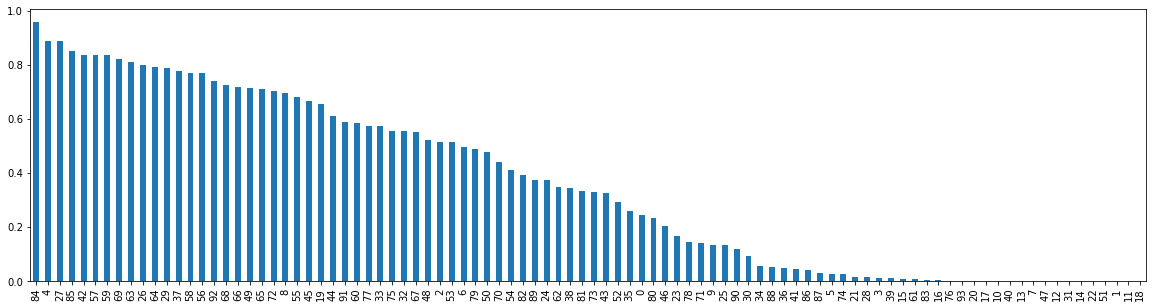

In [179]:
s2.sort_values(ascending=False).plot.bar(figsize=(20,5))

In [186]:
sel1=SelectKBest(score_func=f_classif,k=80).fit(X_train_mi,y_train)
X_train_ao=sel1.transform(X_train_mi)
X_test_ao=sel1.transform(X_test_mi)
X_train_ao.shape,X_test_ao.shape

((16000, 80), (4000, 80))

In [187]:
# ROC_AUC SCORE BASED

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [188]:
def run_rf(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)

    roc_=roc_auc_score(y_test,y_pred)
    return roc_

In [189]:
roc=[]
X_train_ao=pd.DataFrame(X_train_ao)
X_test_ao=pd.DataFrame(X_test_ao)
for i in X_train_ao.columns:
#     print(X_train_ao.iloc[:,i])
    roc__=run_rf(pd.DataFrame(X_train_ao.iloc[:,1]),pd.DataFrame(X_test_ao.iloc[:,1]),y_train,y_test)
    roc.append(roc__)
print(roc)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [190]:
roc_ao=pd.Series(roc,index=X_train_ao.columns)
roc_ao

0     0.5
1     0.5
2     0.5
3     0.5
4     0.5
     ... 
75    0.5
76    0.5
77    0.5
78    0.5
79    0.5
Length: 80, dtype: float64

In [193]:
roc_ao>0.5

0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [199]:
X_train_roc=X_train_ao[roc_ao[roc_ao>=0.5].index.to_list()]
X_test_roc=X_test_ao[roc_ao[roc_ao>=0.5].index.to_list()]
X_train_roc

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,2.0,26.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,90.00,73.32,90.00,0.0,0.0,0.0,0.0,60671.040000
1,2.0,24.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,3.00,0.63,3.00,0.0,0.0,0.0,0.0,117310.979016
2,2.0,23.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,3.00,0.96,3.00,0.0,0.0,0.0,0.0,76236.420000
3,2.0,23.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,46952.520000
4,2.0,84.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,863.22,12.00,60.00,0.0,0.0,0.0,0.0,72548.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,2.0,41.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,346567.140000
15996,2.0,27.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,450.00,62.07,450.00,0.0,0.0,0.0,0.0,142617.660000
15997,2.0,31.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,50815.770000
15998,2.0,31.0,0.0,74.34,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,6.30,0.00,30.81,0.0,0.0,0.0,0.0,33111.090000


In [200]:
def run_rf1(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    
    print(accuracy_score(y_test,y_pred))
    print()



In [201]:
%%time
run_rf1(X_train,X_test,y_train,y_test) #FULL DATA

0.953

Wall time: 1.72 s


In [202]:
%%time
run_rf1(X_train_con,X_test_con,y_train,y_test) #constant removed

0.95425

Wall time: 1.6 s


In [204]:
%%time
run_rf1(X_train_quas,X_test_quas,y_train,y_test) #quasi constant removed

0.952

Wall time: 1.56 s


In [206]:
%%time
run_rf1(X_train_uniq,X_test_uniq,y_train,y_test) #duplicate removed

0.95375

Wall time: 1.46 s


In [208]:
%%time
run_rf1(X_train_mi,X_test_mi,y_train,y_test) #mutual info gain removed

0.953

Wall time: 1.48 s


In [209]:
%%time
run_rf1(X_train_ao,X_test_ao,y_train,y_test) #anova removed

0.954

Wall time: 1.64 s


In [211]:
%%time
run_rf1(X_train_uc,X_test_uc,y_train,y_test) #correlated removed

0.953

Wall time: 1.03 s
